<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> (1) Decision Trees as Interpretable Models
 </b>

<b> 1. (a) Download the Accute Inflamations data from
https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations
</b>

In [1]:
## all imports
import pandas as pd  ## reading the data / data manipulation
from skmultilearn.problem_transform import LabelPowerset  ## used for building decision tree
from sklearn import tree  ## used for building decision tree
from sklearn.tree import DecisionTreeClassifier  ## decision tree classifier
import matplotlib.pyplot as plt  ## used for plotting graphs
from sklearn.tree import _tree  ## used for decision tree
from sklearn.model_selection import train_test_split  ## used for splitting the dataset
import numpy as np  ## used for numpy arrays
from sklearn.impute import SimpleImputer, KNNImputer  ## used to fill na values
import math  ## used for math.floor
import seaborn as sb  ## used for pairplot
from sklearn.linear_model import LinearRegression  ## used for linear regression
from sklearn.metrics import mean_squared_error  ## used for calculating mse
from sklearn.linear_model import Ridge, RidgeCV  ## used for ridge regression
from sklearn.linear_model import Lasso, LassoCV  ## used for lasso regression
from sklearn import preprocessing  ## used for preprocessing
from sklearn import model_selection  ## used for model selection
from sklearn.model_selection import RepeatedKFold  ## used for cross validation
from sklearn.decomposition import PCA  ## used for Principal Component Analysis
from sklearn.model_selection import KFold  ## used for cross validation
import xgboost
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data_location = "../data/diagnosis.data"
## attribute names form diagnosis.names
cols = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra, itch, swelling of urethra outlet', 'decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin']
df = pd.read_csv(data_location,engine = "python",encoding="utf-16le", sep = "\t", header=None)
df.columns = cols
for indx, row in df.iterrows():
    row['Temperature of patient'] = row['Temperature of patient'].replace(",",".")
    
    for it in cols[1:]: ## yes -> 1    No -> 0
        row[it] = 1 if row[it] == "yes" else 0

In [3]:
df.head(5)

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


<b> 1.(b) Build a decision tree on the whole data set and plot it. </b>

[Text(0.4, 0.9, 'X[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'X[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.6, 0.7, 'X[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

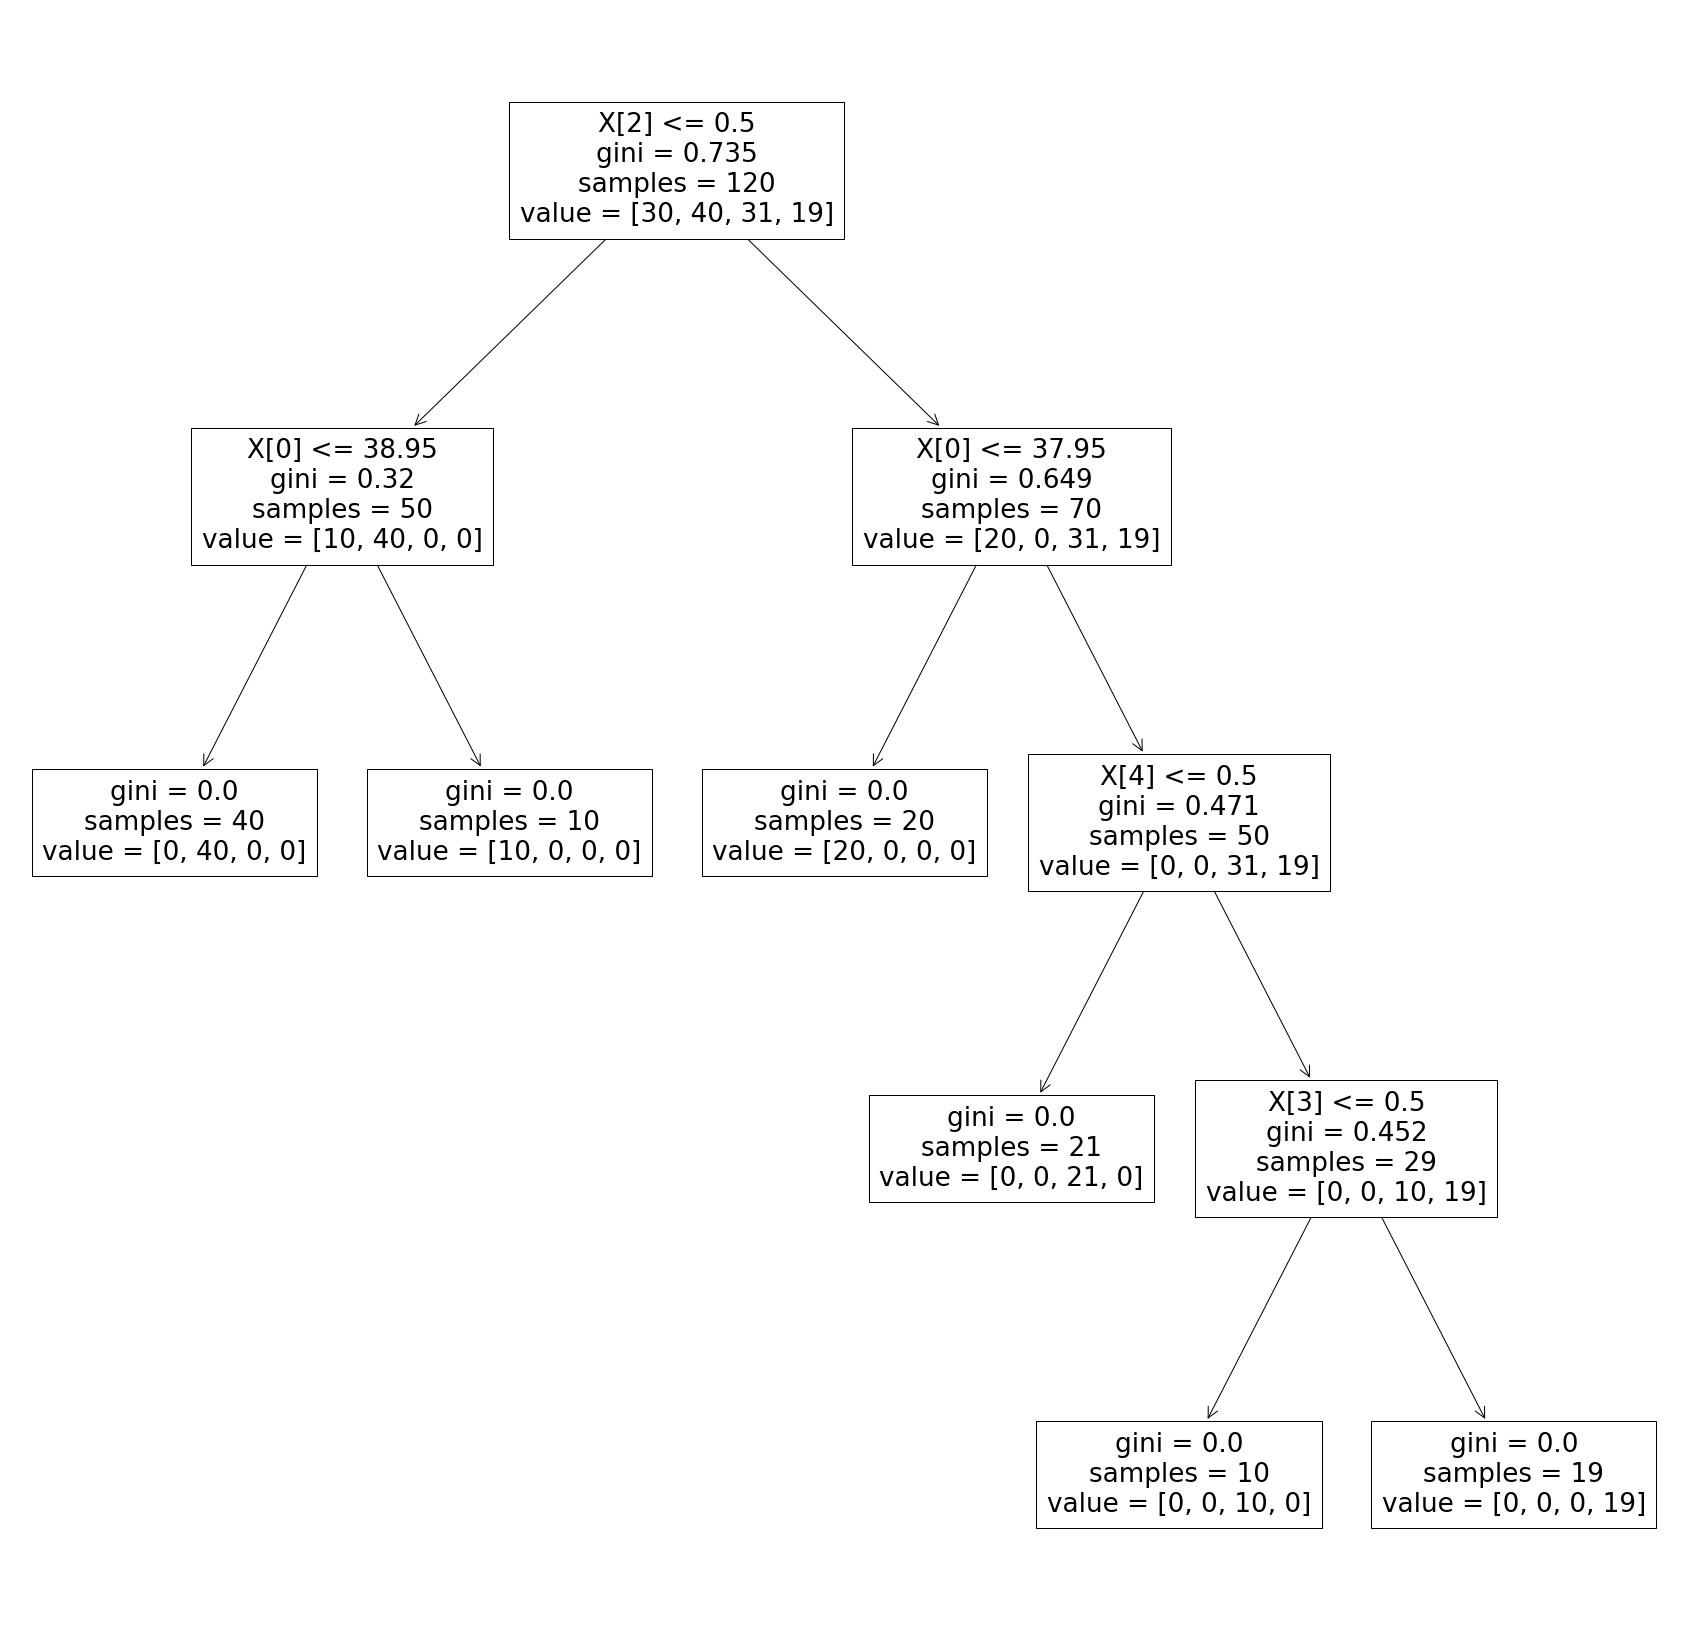

In [4]:
## Reference -> http://scikit.ml/api/skmultilearn.problem_transform.lp.html
X = df.iloc[:,:-2]
Y = df.iloc[:,-2:].astype(float)

new_Y = LabelPowerset(tree.DecisionTreeClassifier(criterion='entropy')).transform(Y)
decision_tree = DecisionTreeClassifier().fit(X, new_Y)

fig = plt.figure(figsize=(30,30))
tree.plot_tree(decision_tree)

<b> 1. (c) Convert the decision rules into a set of IF-THEN rules.</b>

In [5]:
## Reference : https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature 
    ]
    
    
    def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print("{}else: if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                    print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)
    
tree_to_code(decision_tree, cols[:-2])

 if Lumbar pain <= 0.5:
  if Temperature of patient <= 38.95000076293945:
   return [[ 0. 40.  0.  0.]]
  else: if Temperature of patient > 38.95000076293945
   return [[10.  0.  0.  0.]]
 else: if Lumbar pain > 0.5
  if Temperature of patient <= 37.95000076293945:
   return [[20.  0.  0.  0.]]
  else: if Temperature of patient > 37.95000076293945
   if Micturition pains <= 0.5:
    return [[ 0.  0. 21.  0.]]
   else: if Micturition pains > 0.5
    if Urine pushing <= 0.5:
     return [[ 0.  0. 10.  0.]]
    else: if Urine pushing > 0.5
     return [[ 0.  0.  0. 19.]]


<b> 1. (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability. </b>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

minimal_decision_tree = DecisionTreeClassifier(random_state = 42)

min_path = minimal_decision_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = min_path.ccp_alphas, min_path.impurities


temp = []

for it in ccp_alphas:
    minimal_decision_tree = DecisionTreeClassifier(random_state =42, ccp_alpha=it)
    minimal_decision_tree.fit(x_train, y_train)
    
    temp.append([minimal_decision_tree, it])
    

for it,it1 in temp:
    print("Number of Nodes ==> ", it.tree_.node_count)
    print("Alpha ==> ", it1)
    print("****************************************")

Number of Nodes ==>  11
Alpha ==>  0.0
****************************************
Number of Nodes ==>  7
Alpha ==>  0.050438596491228074
****************************************
Number of Nodes ==>  5
Alpha ==>  0.08487159928807522
****************************************
Number of Nodes ==>  3
Alpha ==>  0.10606060606060605
****************************************
Number of Nodes ==>  1
Alpha ==>  0.20214121895281323
****************************************


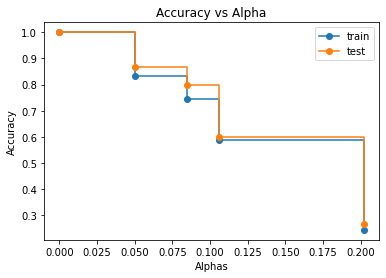

In [7]:
training_score = [dt[0].score(x_train, y_train) for dt in temp]
testing_score = [dt[0].score(x_test, y_test) for dt in temp]

fig, ax = plt.subplots()
ax.set_xlabel("Alphas")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, training_score, label="train", marker = "o", drawstyle="steps-post")
ax.plot(ccp_alphas, testing_score, label="test", marker = "o", drawstyle="steps-post")
ax.legend()

In [8]:
## using gridsearchcv to find best alpha
new_model = DecisionTreeClassifier(random_state=42)
new_path = new_model.cost_complexity_pruning_path(X,Y)
new_possible_alphas, new_impurity = new_path.ccp_alphas, new_path.impurities
print("All Possible values of alpha ==> ", new_possible_alphas)

All Possible values of alpha ==>  [0.         0.04908333 0.07947222 0.11111111 0.20423611]


In [9]:
new_model1 = DecisionTreeClassifier(random_state=42)
new_dec_t_params = {'ccp_alpha':new_possible_alphas}
gridsearchcv = GridSearchCV(new_model1, new_dec_t_params, cv =10)
gridsearchcv = gridsearchcv.fit(X,Y)

bst_dec_t_alpha = gridsearchcv.best_params_['ccp_alpha']
print('Best Alpha for Decision Tree ==> ', bst_dec_t_alpha)

Best Alpha for Decision Tree ==>  0.0


In [10]:
new_model2 = DecisionTreeClassifier(random_state=42, ccp_alpha=bst_dec_t_alpha)
new_model2 = new_model2.fit(X,Y)
print('Number of Nodes in new Decision Tree ==> ', new_model2.tree_.node_count)

Number of Nodes in new Decision Tree ==>  11


In [11]:
tree_to_code(new_model2, cols[:-2])

 if Temperature of patient <= 37.95000076293945:
  if Urine pushing <= 0.5:
   return [[20.  0.]
 [20.  0.]]
  else: if Urine pushing > 0.5
   return [[ 0. 40.]
 [40.  0.]]
 else: if Temperature of patient > 37.95000076293945
  if Lumbar pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else: if Lumbar pain > 0.5
   if Occurrence of nausea <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else: if Occurrence of nausea > 0.5
    if Urine pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else: if Urine pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


<b> 2. The LASSO and Boosting for Regression </b>

<b> 2. (a) Download the Communities and Crime data 3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime . Use the first 1495 rows of data as the training set and the rest as the test set </b>

In [12]:
col_name_location = "../data/communities.names"
data_location = "../data/communities.data"
cols = []

with open(col_name_location, encoding = 'utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if "@attribute" in line:
            cols.append(line.split(" ")[1])
        
print("Total Features ==> ", len(cols))

df = pd.read_table(data_location, delimiter = ',', header=None)
df.columns = cols
df = df.replace("?", np.nan)

train_df = df[:1495]
test_df = df[1495:]

Total Features ==>  128


In [13]:
display(train_df)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [14]:
display(test_df)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


<b> 2. (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.</b> 

In [15]:
non_pred_fts = ['state', 'county', 'community', 'communityname', 'fold']

for it in non_pred_fts:
    cols.remove(it)
    df = df.drop(columns = [it])
    
training_df = df[:1495]
testing_df = df[1495:]

imputer = KNNImputer(n_neighbors=5, weights ='uniform')

training_df = pd.DataFrame(imputer.fit_transform(training_df), columns = cols)
testing_df = pd.DataFrame(imputer.transform(testing_df), columns = cols)


In [16]:
display(training_df)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060,0.040,0.900,0.5,0.32,0.140,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.132,0.052,0.832,0.5,0.00,0.230,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.152,0.040,0.748,0.8,0.00,0.296,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.054,0.022,0.846,0.3,0.00,0.142,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.044,0.020,0.708,0.0,0.00,0.332,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.030,0.016,0.764,0.2,0.00,0.192,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070,0.050,0.850,0.5,0.61,0.190,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.152,0.040,0.794,0.8,0.00,0.306,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.052,0.022,0.718,0.2,0.00,0.324,0.03


In [17]:
display(testing_df)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.018,0.020,0.814,0.6,0.00,0.216,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.100,0.028,0.688,0.5,0.00,0.284,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.058,0.018,0.668,0.5,0.00,0.118,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.034,0.018,0.820,0.0,0.00,0.152,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.076,0.030,0.802,0.4,0.00,0.152,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.072,0.030,0.822,0.5,0.00,0.156,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.140,0.092,0.670,0.6,0.00,0.238,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080,0.060,0.780,0.0,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020,0.020,0.790,0.0,0.22,0.180,0.19


<b> 2. (c) Plot a correlation matrix for the features in the data set </b>

In [18]:
correlation_matrix = training_df.corr()
display(correlation_matrix)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.747424,0.235510,0.283682,0.753584,0.740971,-0.116959,0.058460,0.464459,0.008173,0.364245
householdsize,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,-0.020832,-0.003807,-0.030652,-0.013474,0.032466,-0.036640,-0.028383,-0.086315,-0.004999,-0.031156
racepctblack,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,0.155017,0.101270,0.169002,0.343447,0.196551,-0.244521,0.167136,0.257781,0.066984,0.644094
racePctWhite,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.147054,-0.339787,-0.234460,-0.369392,-0.294865,0.223214,-0.265905,-0.272366,-0.056074,-0.690614
racePctAsian,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.004790,0.360708,0.274826,-0.002237,0.147663,-0.000413,0.079832,0.100653,0.010334,0.034705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.116959,-0.036640,-0.244521,0.223214,-0.000413,-0.046902,-0.204850,-0.219402,-0.200705,0.071604,...,-0.088242,0.063305,0.067499,-0.220659,-0.135628,1.000000,-0.188081,-0.061135,-0.248053,-0.215687
LemasGangUnitDeploy,0.058460,-0.028383,0.167136,-0.265905,0.079832,0.208465,0.156777,0.141497,0.128186,0.023607,...,0.043260,-0.022809,-0.186180,0.141804,0.055482,-0.188081,1.000000,0.010915,0.063308,0.258217
LemasPctOfficDrugUn,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,0.322885,0.236545,0.209710,0.240218,0.196465,-0.061135,0.010915,1.000000,0.037986,0.331882
PolicBudgPerPop,0.008173,-0.004999,0.066984,-0.056074,0.010334,0.020454,-0.097061,-0.095976,-0.109081,0.017964,...,-0.067532,0.075038,0.078516,0.266199,0.262072,-0.248053,0.063308,0.037986,1.000000,0.108014


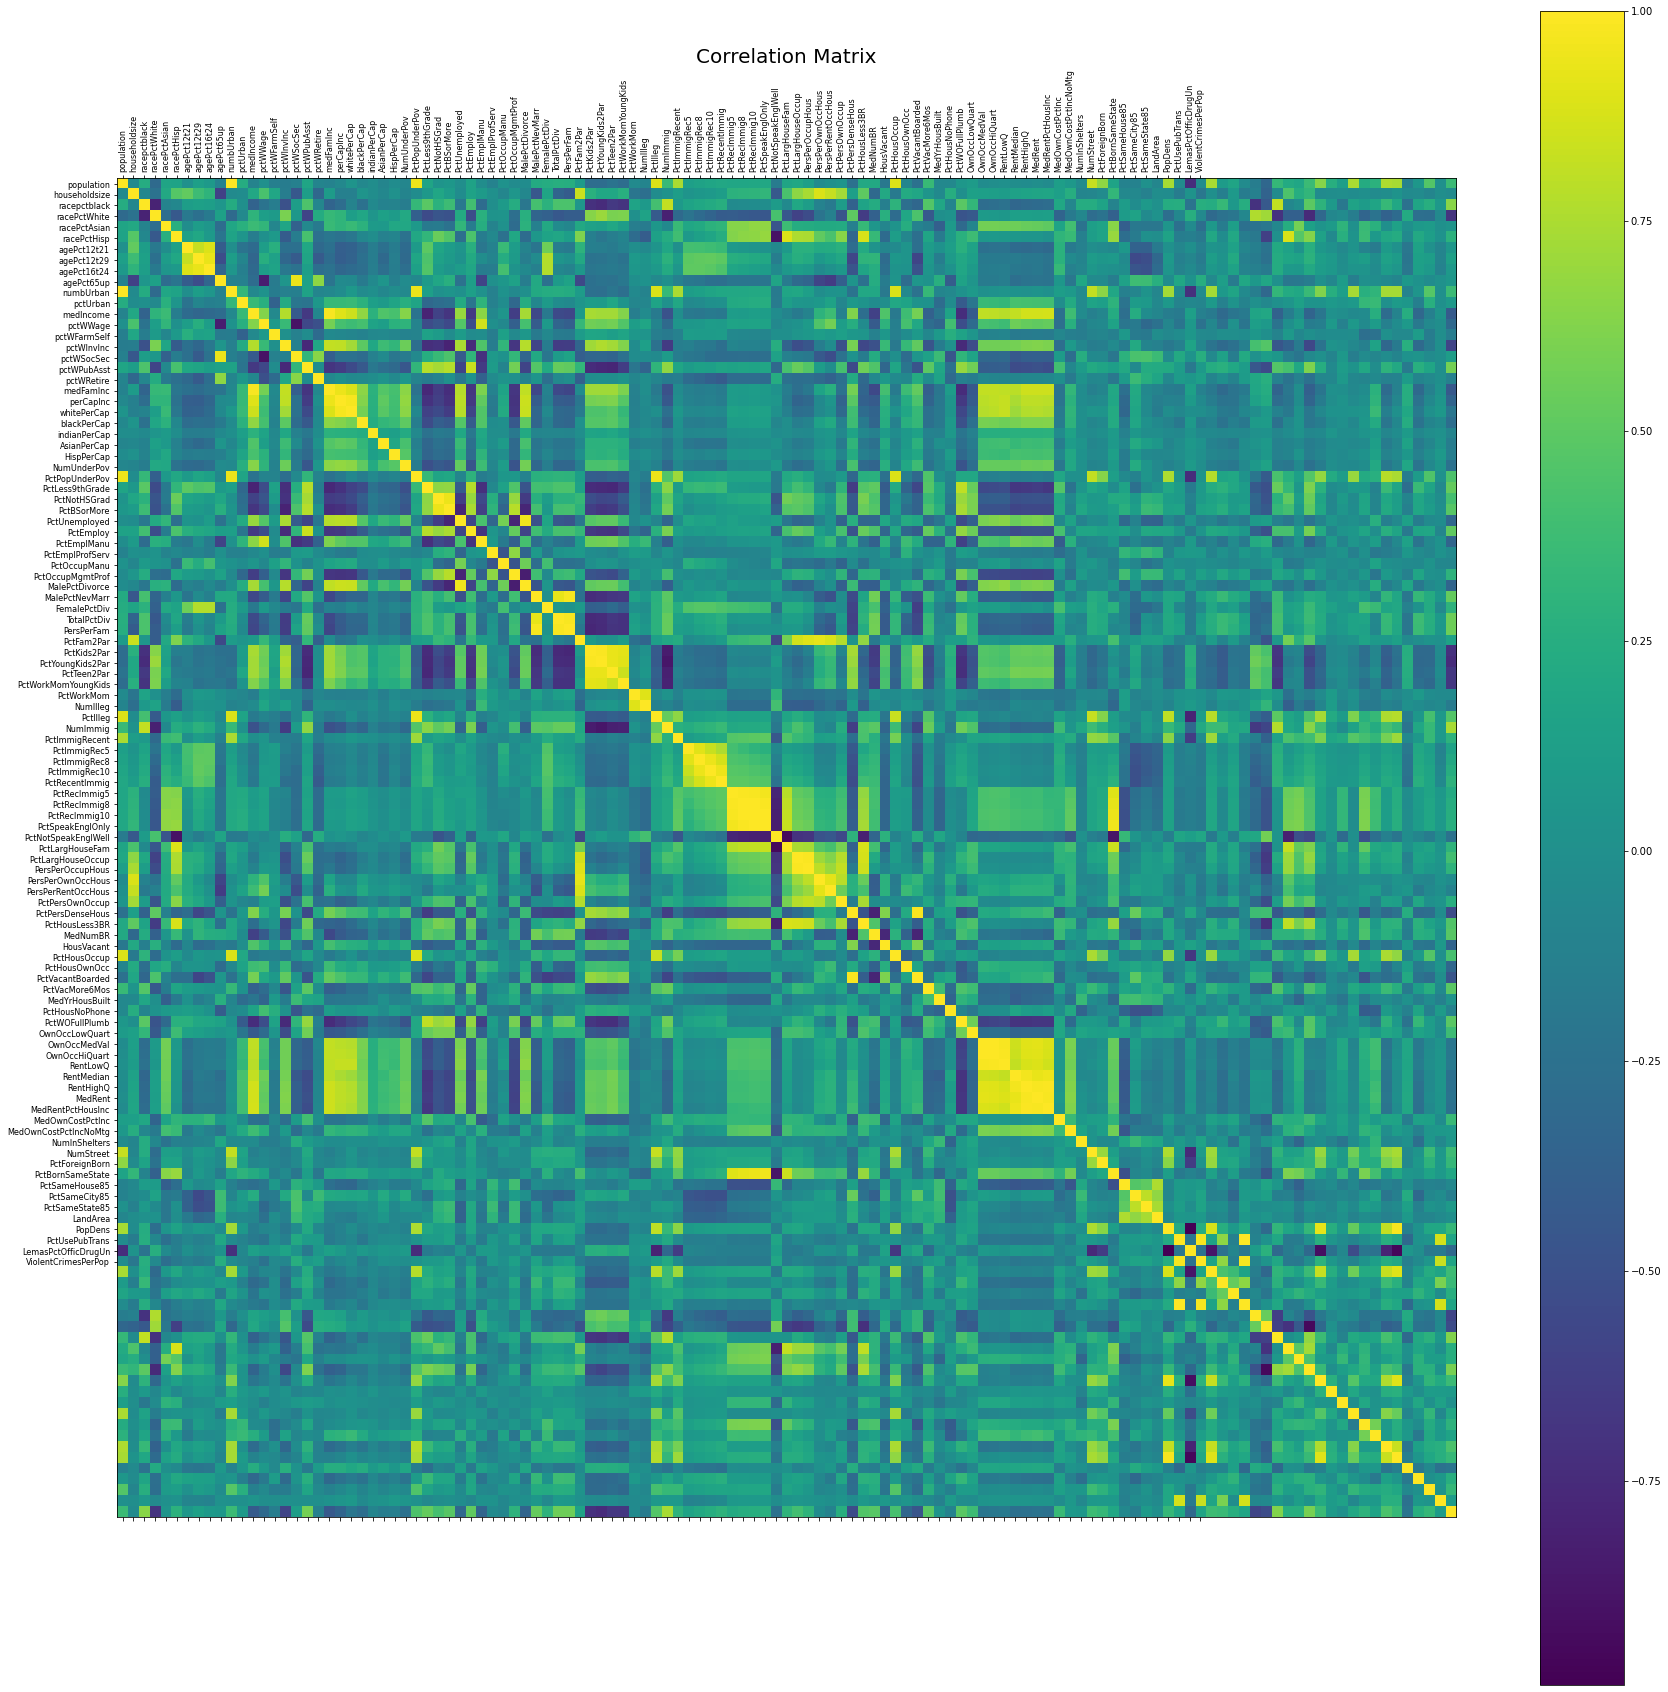

In [19]:
## Reference https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
fig = plt.figure(figsize=(30,30))
plt.matshow(correlation_matrix, fignum = fig.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8)
plt.title("Correlation Matrix", fontsize = 20)
color_bar = plt.colorbar()
plt.show()

<b> 2. (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean..</b>

In [20]:
vals = training_df.values
cv =  lambda x: np.std(x) / np.mean(x)
ans = np.apply_along_axis(cv, axis=0, arr=vals)

for x in range(len(cols)):
    print("Coefficient of Variation CV for ==> ", cols[x], "is ==> ", ans[x])
    print("******************************************************************")

Coefficient of Variation CV for ==>  population is ==>  2.240354965879167
******************************************************************
Coefficient of Variation CV for ==>  householdsize is ==>  0.3556805499866515
******************************************************************
Coefficient of Variation CV for ==>  racepctblack is ==>  1.4284074506092599
******************************************************************
Coefficient of Variation CV for ==>  racePctWhite is ==>  0.3301022059521686
******************************************************************
Coefficient of Variation CV for ==>  racePctAsian is ==>  1.3586450597327888
******************************************************************
Coefficient of Variation CV for ==>  racePctHisp is ==>  1.6115517541662485
******************************************************************
Coefficient of Variation CV for ==>  agePct12t21 is ==>  0.36895965939030007
**************************************************************

<b> 2. (e) Pick b √ 128 c features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?</b>

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,LemasSwornFT,numbUrban,HousVacant,PctPolicAsian
0,4.291487,3.469791,3.057941,2.925656,2.552092,2.34166,2.240355,2.08514,2.03778,1.967809,1.839875


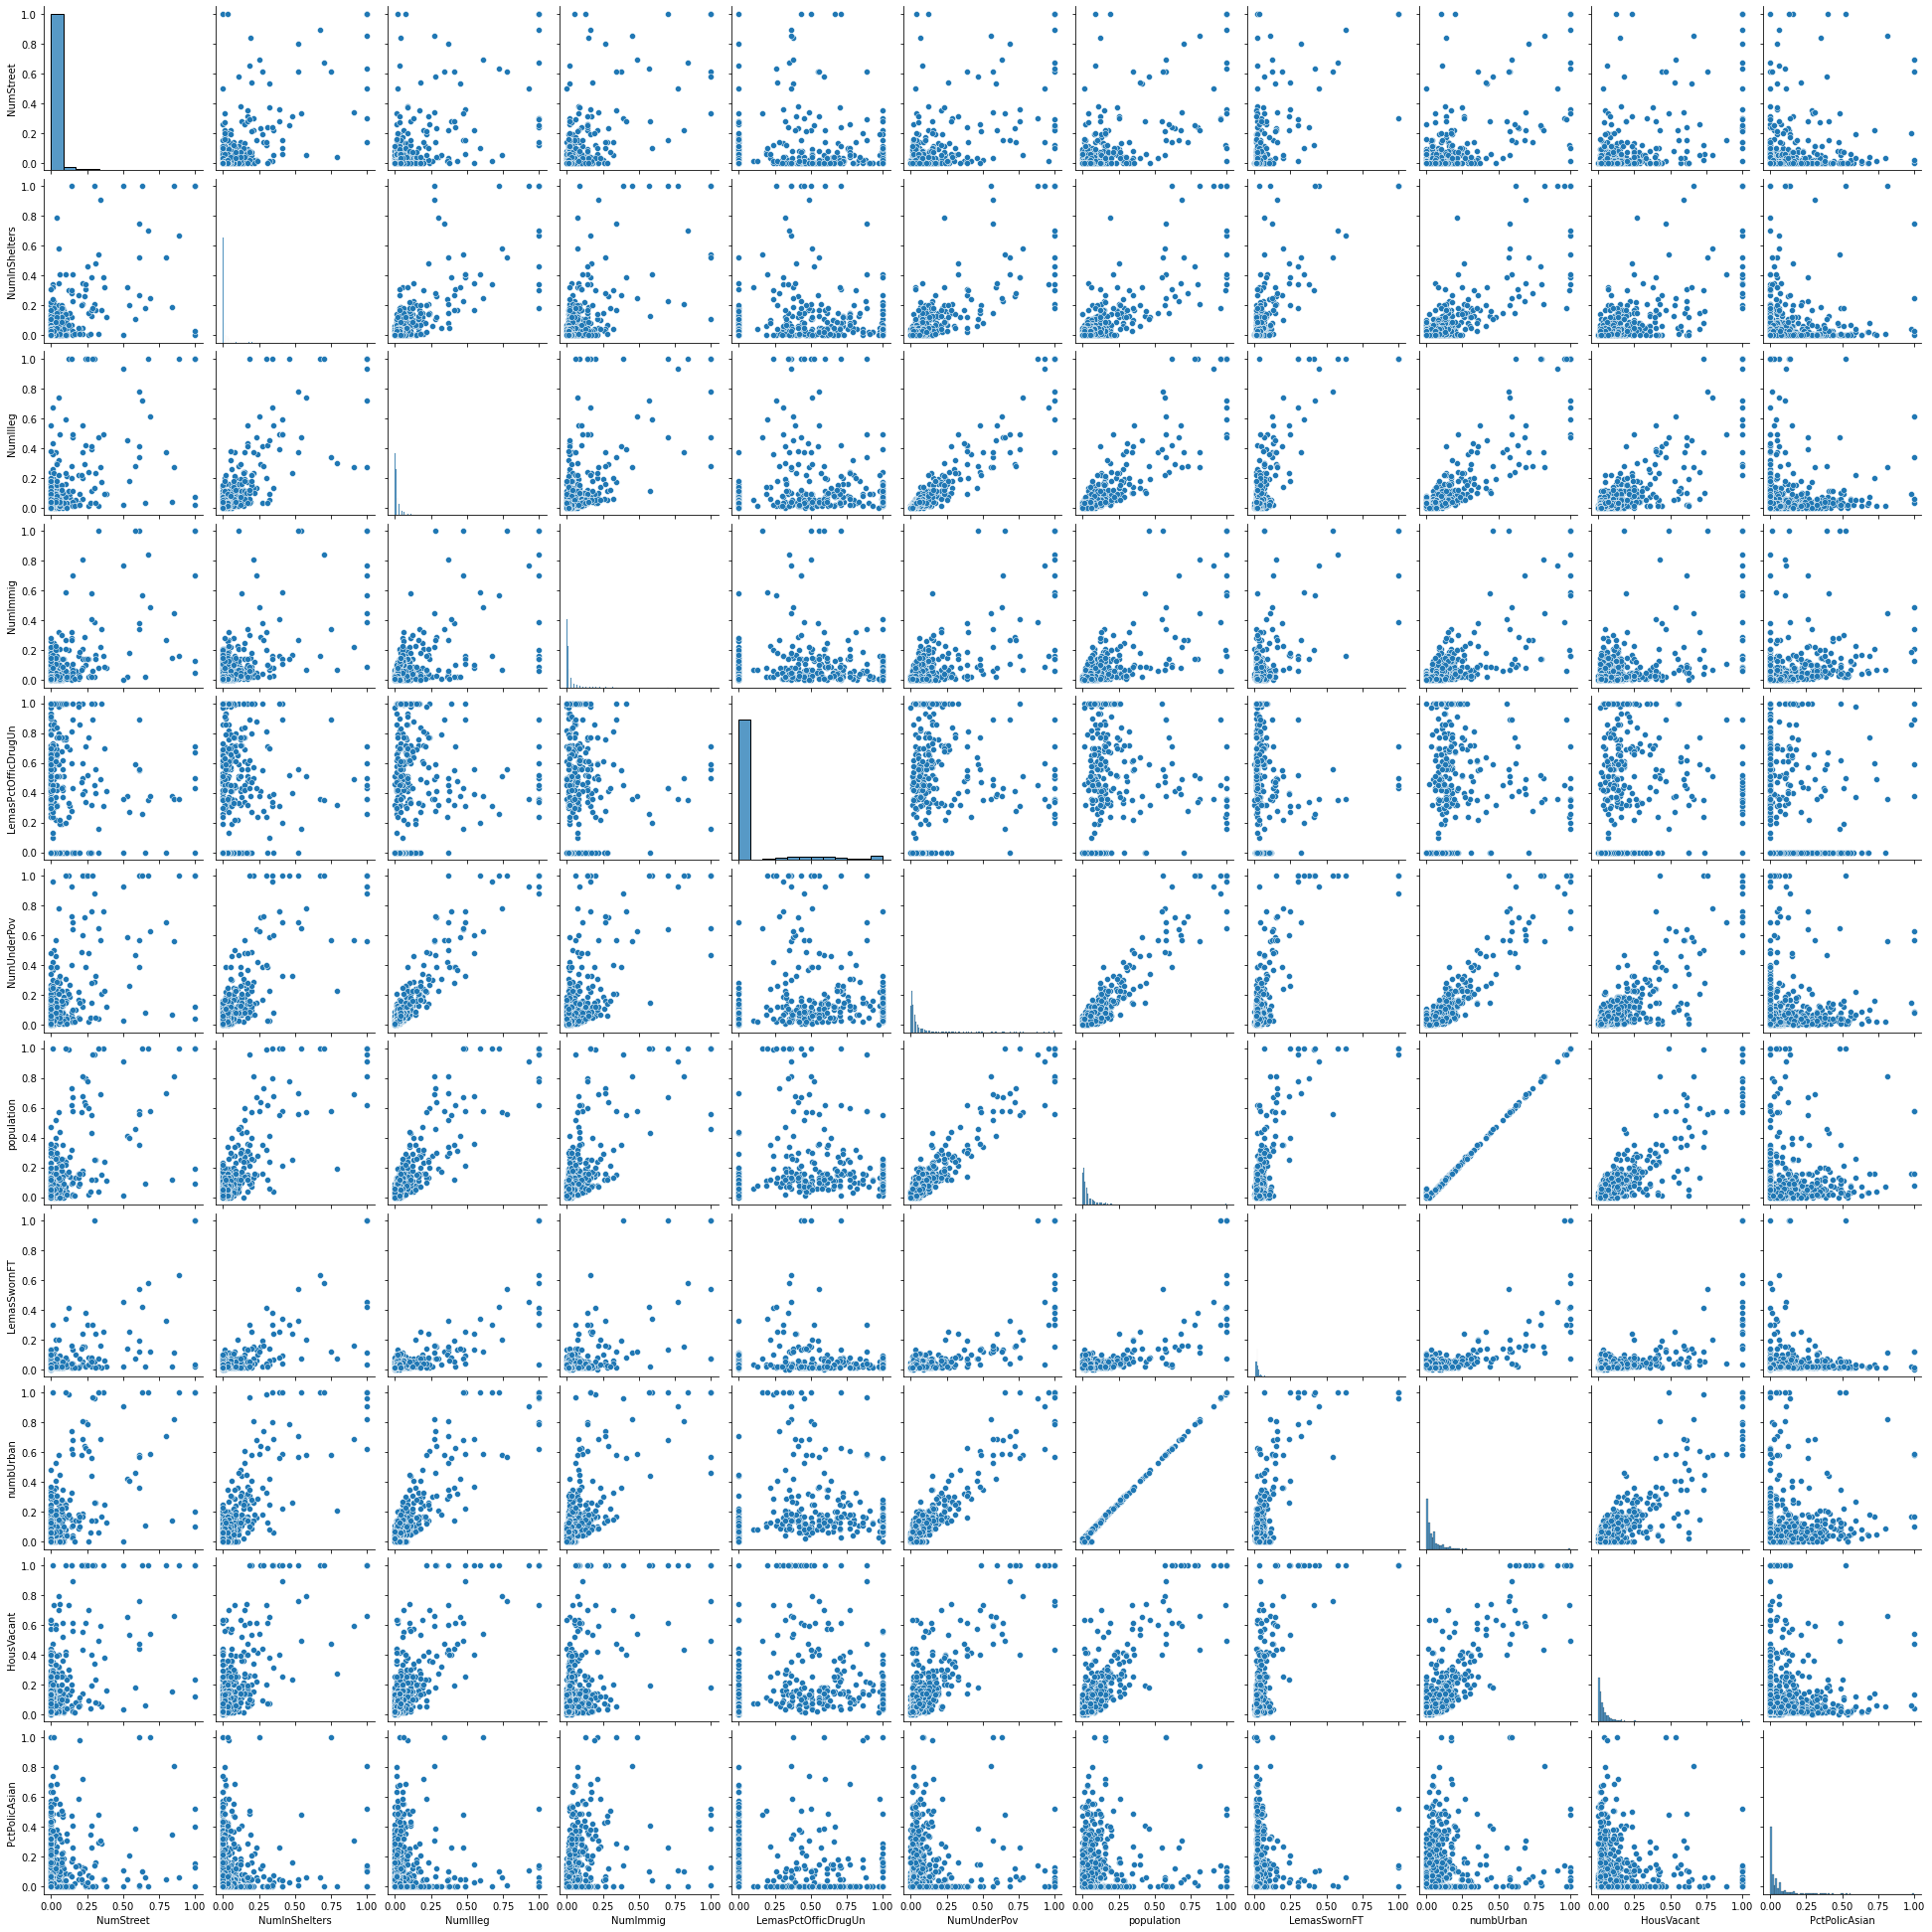

In [21]:
temp = [[ans[x],cols[x]] for x in range(len(cols))]

temp = sorted(temp, key = lambda x:-x[0])
temp = temp[:math.floor(math.sqrt(128))]

hdr = []
val = []

for it1,it2 in temp:
    hdr.append(it2)
    val.append(it1)
    
new_df = pd.DataFrame(data=np.reshape(val,(1,11)), columns =hdr)
display(new_df)

sb.pairplot(training_df[hdr])

<AxesSubplot:>

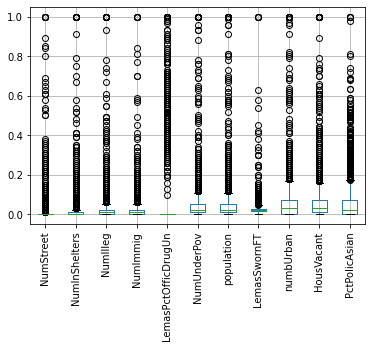

In [22]:
training_df[hdr].boxplot(rot=90, fontsize = 10)

<b> 2. (f) Fit a linear model using least squares to the training set and report the test error</b>

In [23]:
x_train = training_df.iloc[:,0:122]
y_train = training_df.iloc[:,122]
x_test = testing_df.iloc[:,0:122]
y_test = testing_df.iloc[:,122]

linear_regression = LinearRegression().fit(x_train, y_train)
train_pred_y = linear_regression.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred_y)
test_pred_y = linear_regression.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred_y)

print("Train MSE ==> ", mse_train)
print("Test MSE ==> ", mse_test)

Train MSE ==>  0.015574205314223481
Test MSE ==>  6.190532070503328e+17


<b> 2. (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained</b>

In [24]:
alp = 10**np.linspace(10,-2,100)*0.5
ridge_regression = RidgeCV(alphas=alp, cv = 10)
ridge_regression = ridge_regression.fit(x_train, y_train)

bst_alpha = ridge_regression.alpha_
print("Best Alpha for Ridge Regression ==> ", bst_alpha)

ridge_regression = Ridge(alpha = bst_alpha)
ridge_regression = ridge_regression.fit(x_train, y_train)

ridge_regressioin_pred_y = ridge_regression.predict(x_test)

ridge_mse = mean_squared_error(y_test, ridge_regressioin_pred_y)
print("Ridge MSE ==> ", ridge_mse)

Best Alpha for Ridge Regression ==>  1.7555958671075638
Ridge MSE ==>  0.01703503651335724


<b> 2. (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized 4 features. Report the test error for both cases and compare them.</b>

In [25]:
alp = 10**np.linspace(10,-2,100)*0.5
lasso_regression = LassoCV(alphas=alp, cv = 10)
lasso_regression = lasso_regression.fit(x_train, y_train)

bst_alpha_lasso = lasso_regression.alpha_
print("Best Alpha for Lasso Regression ==> ", bst_alpha_lasso)

lasso_regression = Lasso(alpha = bst_alpha_lasso)
lasso_regression = lasso_regression.fit(x_train, y_train)

lasso_regressioin_pred_y = lasso_regression.predict(x_test)

lasso_mse = mean_squared_error(y_test, lasso_regressioin_pred_y)
print("Lasso MSE ==> ", lasso_mse)

Best Alpha for Lasso Regression ==>  0.005
Lasso MSE ==>  0.018805364920055027


In [26]:
lasso_coeff = lasso_regression.coef_
selected_fts = []
for x in range(len(lasso_coeff)):
    if lasso_coeff[x]!=0:
        selected_fts.append(cols[x])
        
print("Number of Selected Features ==> ", len(selected_fts))
print("Variables selected by lasso model ==> ")
print(selected_fts)

Number of Selected Features ==>  8
Variables selected by lasso model ==> 
['racePctWhite', 'pctUrban', 'MalePctDivorce', 'PctKids2Par', 'PctIlleg', 'PctPersDenseHous', 'HousVacant', 'PctVacantBoarded']


In [27]:
scaler = preprocessing.StandardScaler()
scaler_x_train = scaler.fit_transform(x_train)
scaler_x_test = scaler.fit_transform(x_test)

alp = 10**np.linspace(10,-2,100)*0.5
scaler_lasso_regression = LassoCV(alphas=alp, cv = 10)
scaler_lasso_regression = scaler_lasso_regression.fit(scaler_x_train, y_train)

scaler_bst_alpha_lasso = scaler_lasso_regression.alpha_
print("Best Alpha for Lasso Regression Scaler ==> ", scaler_bst_alpha_lasso)

scaler_lasso_regression = Lasso(alpha = scaler_bst_alpha_lasso)
scaler_lasso_regression = scaler_lasso_regression.fit(scaler_x_train, y_train)

scaler_lasso_regressioin_pred_y = scaler_lasso_regression.predict(scaler_x_test)

scaler_lasso_mse = mean_squared_error(y_test, scaler_lasso_regressioin_pred_y)
print("Lasso MSE Scaler ==> ", scaler_lasso_mse)

Best Alpha for Lasso Regression Scaler ==>  0.005
Lasso MSE Scaler ==>  0.017089445794301855


In [28]:
scaler_lasso_coeff = scaler_lasso_regression.coef_
scaler_selected_fts = []
for x in range(len(scaler_lasso_coeff)):
    if scaler_lasso_coeff[x]!=0:
        scaler_selected_fts.append(cols[x])
        
print("Number of Selected features ==> ", len(scaler_selected_fts))
print("Variables selected by lasso model ==> ")
print(scaler_selected_fts)

Number of Selected features ==>  26
Variables selected by lasso model ==> 
['racepctblack', 'agePct12t29', 'pctUrban', 'pctWInvInc', 'pctWRetire', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicBlack', 'PctPolicAsian', 'PolicAveOTWorked', 'PolicBudgPerPop']


In [29]:
ans_rows = []
ans_cols = ["Model Name", "Test MSE"]

ans_rows.append(["Lasso Regression", lasso_mse])
ans_rows.append(["Lasso Regression (With Standardized Features)", scaler_lasso_mse])


ans_df = pd.DataFrame(data=ans_rows, columns = ans_cols)
display(ans_df)

,Model Name,Test MSE
0,Lasso Regression,0.018805
1,Lasso Regression (With Standardized Features),0.017089


In [30]:
print("As seen from the above observation, standardizing features on already normalized dataset does not result much improvement in model performance")

As seen from the above observation, standardizing features on already normalized dataset does not result much improvement in model performance


<b> 2. (i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained</b>

In [32]:
pcr_errors = {}
print("Number of Features ==> ", len(cols[:-1]))
n = len(cols[:-1])
train_x = x_train
train_y = y_train
for x in range(1, n+1):
    k_folds = KFold(n_splits=10, shuffle=False)
    cv_err = []
    for train_indx, val_indx in k_folds.split(train_x, train_y):
        pca_train_x = []
        pca_train_y = []
        
        for f in train_indx:
            pca_train_x.append(train_x.iloc[f])
            pca_train_y.append(train_y.iloc[f])
            
        pca_train_x = pd.DataFrame(data=pca_train_x, columns = cols[:-1])
        pca_train_y = pd.DataFrame(data=pca_train_y, columns = [cols[-1]])
        
        
        pca_validation_x = []
        pca_validation_y = []
        
        for f in val_indx:
            pca_validation_x.append(train_x.iloc[f])
            pca_validation_y.append(train_y.iloc[f])
            
        pca_validation_x = pd.DataFrame(data=pca_validation_x, columns = cols[:-1])
        pca_validation_y = pd.DataFrame(data=pca_validation_y, columns = [cols[-1]])
            
            
        pca = PCA(n_components=x)
        pca = pca.fit(pca_train_x)
        
        new_pca_train_x = pca.transform(pca_train_x)
        new_pca_validation_x = pca.transform(pca_validation_x)
        
        
        pcr_model = LinearRegression()
        pcr_model = pcr_model.fit(new_pca_train_x, pca_train_y)
        
        pca_validation_pred_y = pcr_model.predict(new_pca_validation_x)
        pca_error = mean_squared_error(pca_validation_y, pca_validation_pred_y)
        cv_err.append(pca_error)
        
    pcr_errors[x] = np.mean(cv_err)
        
pcr_cols = ["M", "Cross Validation MSE"]
pcr_rows = []
for x in pcr_errors:
    pcr_rows.append([x,pcr_errors[x]])
    
pcr_df = pd.DataFrame(data = pcr_rows, columns = pcr_cols)
    

Number of Features ==>  122


In [33]:
display(pcr_df)

,M,Cross Validation MSE
0,1,0.035608
1,2,0.029891
2,3,0.026676
3,4,0.023155
4,5,0.021762
...,...,...
117,118,0.019502
118,119,0.019534
119,120,0.019541
120,121,0.019747


In [34]:
compare = [[x,pcr_errors[x]] for x in pcr_errors]
compare = sorted(compare, key = lambda x:x[1])

best_m = compare[0][0]
least_cv_mse = compare[0][1]

print("Best M (Number of Principal Components) ==> ", best_m)
print("Cross Validation MSE for best M ==> ", least_cv_mse)
    

Best M (Number of Principal Components) ==>  97
Cross Validation MSE for best M ==>  0.018805599720595922


<b> 2. (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L 1 -penalized regression at each node. Such a tree is called L 1 penalized gradient boosting tree. You can use XGBoost 5 to fit the model tree. Determine α (the regularization term) using cross-validation </b>

In [35]:
##http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10.py
alphas = 10**np.linspace(10,-2,100)*0.5
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model_params = {'reg_alpha': alphas}
xgb_validation_model = GridSearchCV(xgb_model, xgb_model_params, cv = 10)
xgb_validation_model = xgb_validation_model.fit(x_train, y_train)

In [36]:
xgb_best_alpha = xgb_validation_model.best_params_['reg_alpha']
print("Best Alpha for XGBOOST ==> ", xgb_best_alpha)

Best Alpha for XGBOOST ==>  2.320794416806386


In [39]:
xgb_final_model = XGBRegressor(objective='reg:squarederror', reg_alpha=xgb_best_alpha)
xgb_final_model = xgb_final_model.fit(x_train, y_train)

xgb_predicts_test_y = xgb_final_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_predicts_test_y)

print("Test MSE for XGBOOST ==> ", xgb_mse)

Test MSE for XGBOOST ==>  0.018332662071684873
